In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy import integrate
import math

%matplotlib inline

In [35]:
# Modules & functions

def mstoBT(t):
    """
    Conversion between time in milliseconds to non-dimensional Brownian time (BT, of the ribosome)
        Parameters:
            t (real): time in ms
        Returns:
            output (real): time in non-dimensional BT
    """
    return t / 0.0000006244


def BTtoms(t):
    """
    Conversion between time in non-dimensional Brownian time (BT, of the ribosome) to milliseconds
        Parameters:
            t (real): time in non-dimensional BT
        Returns:
            output (real): time in ms
    """
    return t * 0.0000006244


$\textbf{FIGURE S1}$: Calculating the scaling factor to account for the effect of confinement and hydrodynamic interactions on long-time diffusivity, as a function of volume fraction.

CONFINED long time self diffusivity (BD, SD) for phi = 0.2, 0.3, 0.4
UNBOUND long time self diffusivity (BD, SD) for phi = 0.2, 0.3, 0.4
addition of confinement [1.04275287 1.08932462 1.18063754]
addition of hydrodynamics [1.45095763 1.78507676 2.22816399]
addition of hydro + conf [2.13857998 3.03951368 4.59347726]


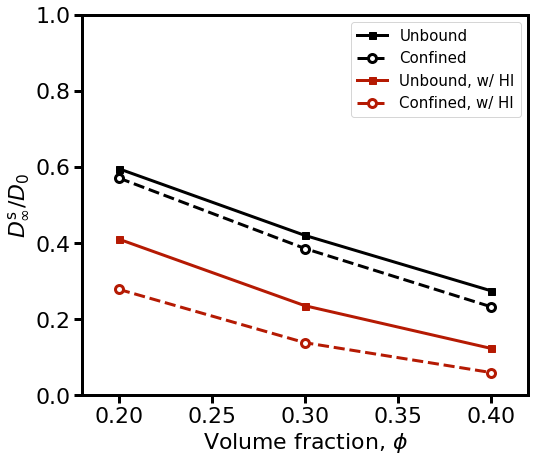

In [3]:
fig, ax = plt.subplots()

D_monoconfHI_s_0 = [0.4676, 0.329, 0.2177] # data from Aponte-Rivera et al. 2018
D_monoconf_s_0 = [0.959, 0.918, 0.847] # data from Sunol et al. 2023

D_monoconf_s_inf = np.zeros((3,))
D_monoconfHI_s_inf = np.zeros((3,))
D_mono_s_inf = np.zeros((3,))
D_monoHI_s_inf = np.zeros((3,))
phi = [0.2, 0.3, 0.4]
gr_peak = [1.7, 2.3, 3.3] # see PY theory in SI Appendix
divide = []

print('CONFINED long time self diffusivity (BD, SD) for phi = 0.2, 0.3, 0.4') # relative to SE diffusivity D0
for i in range(0,3): 
    divide.append(1+2*phi[i]*gr_peak[i]) # see eq. S1
    D_monoconf_s_inf[i] = D_monoconf_s_0[i]/divide[i]        
    D_monoconfHI_s_inf[i] = D_monoconfHI_s_0[i]/divide[i]
    
print('UNBOUND long time self diffusivity (BD, SD) for phi = 0.2, 0.3, 0.4') # relative to SE diffusivity D0
for i in range(0,3):
    divide.append(1+2*phi[i]*gr_peak[i])
    D_mono_s_inf[i] = 1/divide[i]     
    D_monoHI_s_o = 1-1.73*phi[i]+0.88*(phi[i]**2) # see eq. S3
    D_monoHI_s_inf[i] = D_monoHI_s_o/divide[i]

ax.plot(phi,D_mono_s_inf, color='k', zorder=10, linewidth=3, markersize=7, marker='s', label='Unbound')
ax.plot(phi,D_monoconf_s_inf, color='k', zorder=10, linewidth=3, markersize=8, linestyle='dashed', marker='o', markerfacecolor='w', markeredgecolor='k', markeredgewidth=3, label='Confined')
ax.plot(phi,D_monoHI_s_inf, color='#B51A03', zorder=10, linewidth=3, markersize=7, marker='s', label='Unbound, w/ HI')
ax.plot(phi,D_monoconfHI_s_inf, color='#B51A03', zorder=10, linewidth=3, markersize=8, linestyle='dashed', marker='o', markerfacecolor='w', markeredgecolor='#B51A03', markeredgewidth=3, label='Confined, w/ HI')

print('addition of confinement', D_mono_s_inf/D_monoconf_s_inf)
print('addition of hydrodynamics', D_mono_s_inf/D_monoHI_s_inf)
print('addition of hydro + conf', D_mono_s_inf/D_monoconfHI_s_inf)

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.18,0.42)
    ax.set_ylim(0,1)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Volume fraction, $\phi$',size=22)
    ax.set_ylabel('$D_\infty^\mathrm{s}/D_0$',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
        
ax.legend(prop={'size': 15},loc='upper right')
fig.set_size_inches(8,7)
plt.savefig('./images/FigS1.png', bbox_inches='tight', dpi=300)

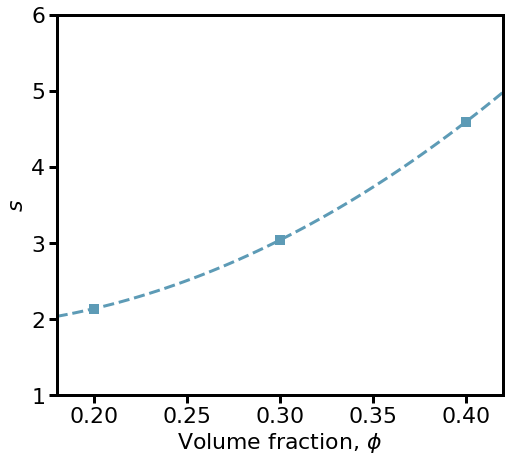

In [4]:
fig, ax = plt.subplots()

val = [2.13857998, 3.03951368, 4.59347726] # from above
# fitting to second-order polynomial
ax.scatter(phi,val, color='#5D9BB6', zorder=10, linewidth=0, s=100, marker='s')
p = np.polyfit(phi,val,2)
testphi=np.linspace(0.18,0.42)
ax.plot(testphi,np.polyval(p, testphi),color='#5D9BB6',linestyle='dashed',linewidth=3)

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.18,0.42)
    #ax.set_yscale('log')
    ax.set_ylim(1,6)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Volume fraction, $\phi$',size=22)
    ax.set_ylabel(r'$s$',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
        
fig.set_size_inches(8,7)
plt.savefig('./images/scaleD.png', bbox_inches='tight', dpi=300)

$\textbf{FIGURE S4}$: Plotting the mean-squared displacement for all three molecule types (top to bottom) in translation voxels at all growth rates/volume fractions (left to right) and isotropic attraction strengths (colors). Extracting the long-time self-diffusivity.

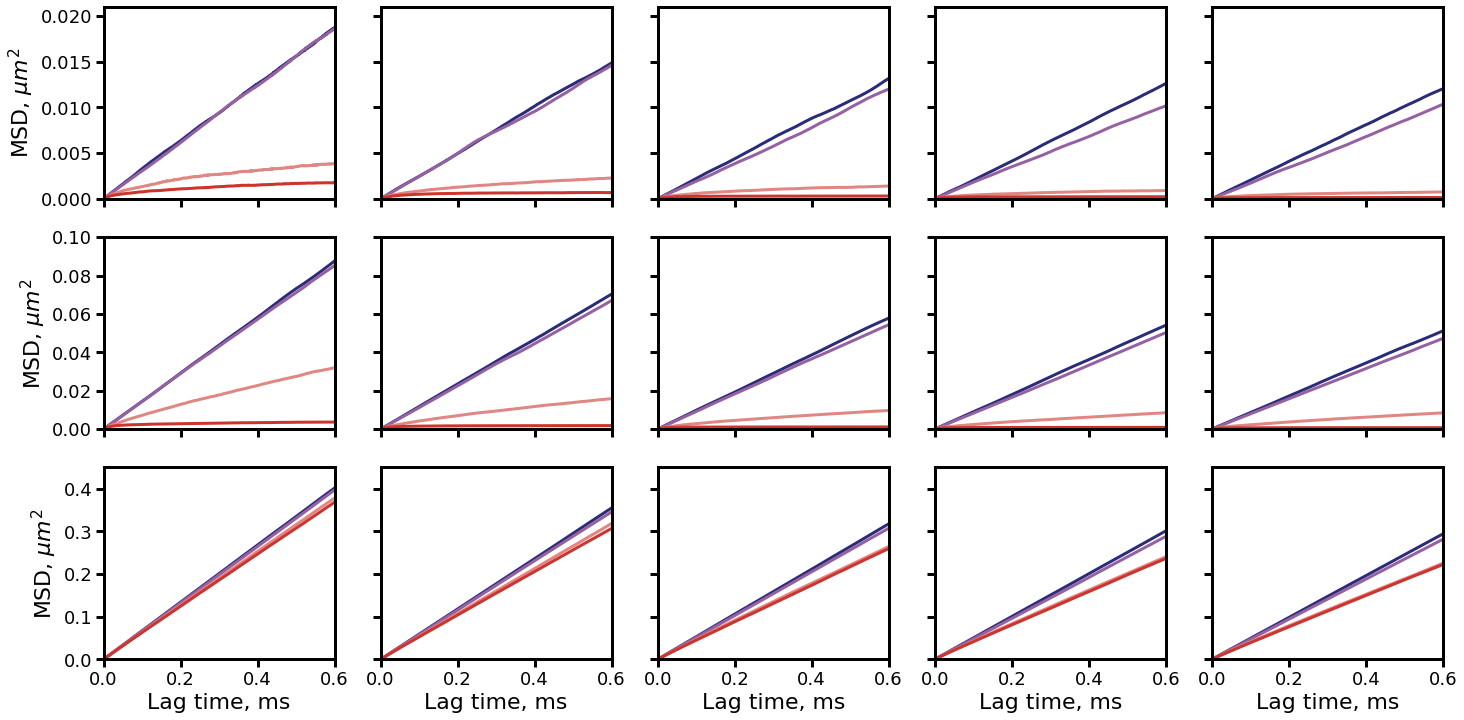

In [12]:
fig, ((ax11,ax12,ax13,ax14,ax15),(ax21,ax22,ax23,ax24,ax25),(ax31,ax32,ax33,ax34,ax35)) = plt.subplots(3,5)
axes_all = ((ax11,ax12,ax13,ax14,ax15),(ax21,ax22,ax23,ax24,ax25),(ax31,ax32,ax33,ax34,ax35))

eps = [0,3,6,16]
phi = [22,30,36,39,41]
col = ['#2A2C77', '#9661A2', '#E08683', '#CE342D']
rscale = 0.026*0.026                # um^2
tscale = 0.0000005*4*0.0067723   # s

ymax=[0.021,0.10,0.45]
ymin=[0,0,0]

#####
molec_all = ['rib', 'TC', 'crowd']
for i in range(0,3):           # ribosome, TC, crowder          ROW
    molec_curr = molec_all[i]
    for j in range(0,5):       # gr1, gr1.5, gr2, gr2.5, gr3    FIGURE
        axis_curr = axes_all[i][j]
        phi_curr = phi[j]
        for k in range (0,4):  # eps0, eps3, eps6, eps16        LINE
            eps_curr = eps[k]
            if ((k==1) or (k==0)): # for eps = 0 & 3, more replicates are required to obtain representative statistics
                time = np.zeros(4500)
                MSD = np.zeros(4500)
                for l in range(0,9):
                    filename_ii = '../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/MSD_Isotropic/f{}_e{}/msd_f{}_e{}_{}.txt'.format(phi_curr,eps_curr,phi_curr,eps_curr,l)
                    MSD_ii = np.loadtxt(filename_ii)
                    time = time + MSD_ii[:4500,0]/9
                    MSD = MSD + MSD_ii[:4500,i+1]/9                   
                time = [x*tscale for x in time]
                MSD = [x*rscale for x in MSD]
                p,V = np.polyfit(time[1477:4431],MSD[1477:4431],1,cov=True) # obtaining long-time self-diffusivity
                # below, printing diffusivity
#                 print('molec{} phi{} eps{}: {}'.format(molec_curr, phi_curr, eps_curr, p[0]/6))
                axis_curr.plot(time, MSD, color=col[k], linewidth=3, label='$\epsilon_a_t_t_r$ = {} kT'.format(eps_curr))
                axis_curr.set_ylim(ymin[i],ymax[i])
            else: # for eps = 6, 16
                filename = '../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/MSD_Isotropic/msd_f{}_e{}.txt'.format(phi_curr,eps_curr)
                MSD = np.loadtxt(filename)
                time = MSD[:,0]
                time = [x*tscale for x in time]
                MSD = MSD[:,i+1]
                MSD = [x*rscale for x in MSD]
                p,V = np.polyfit(time[1477:4431],MSD[1477:4431],1,cov=True) # obtaining long-time self-diffusivity
                # below, printing diffusivity
#                 print('molec{} phi{} eps{}: {}'.format(molec_curr, phi_curr, eps_curr, p[0]/6))
                axis_curr.plot(time, MSD, color=col[k], linewidth=3, label='$\epsilon_a_t_t_r$ = {} kT'.format(eps_curr))
                axis_curr.set_ylim(ymin[i],ymax[i])
#####

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0,6e-1)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Lag time, ms',size=22)
    ax.set_ylabel('MSD, $\mu m^2$',size=22)
    ax.tick_params(axis='both', labelsize=18,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
        
for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(24,12)
plt.savefig('./images/Fig_S4.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S9}$: Plotting the mean-squared displacement for all three molecule types (top to bottom) in translation voxels at all growth rates/volume fractions (left to right) with limited-valency attractions (colors). Extracting the long-time self-diffusivity.

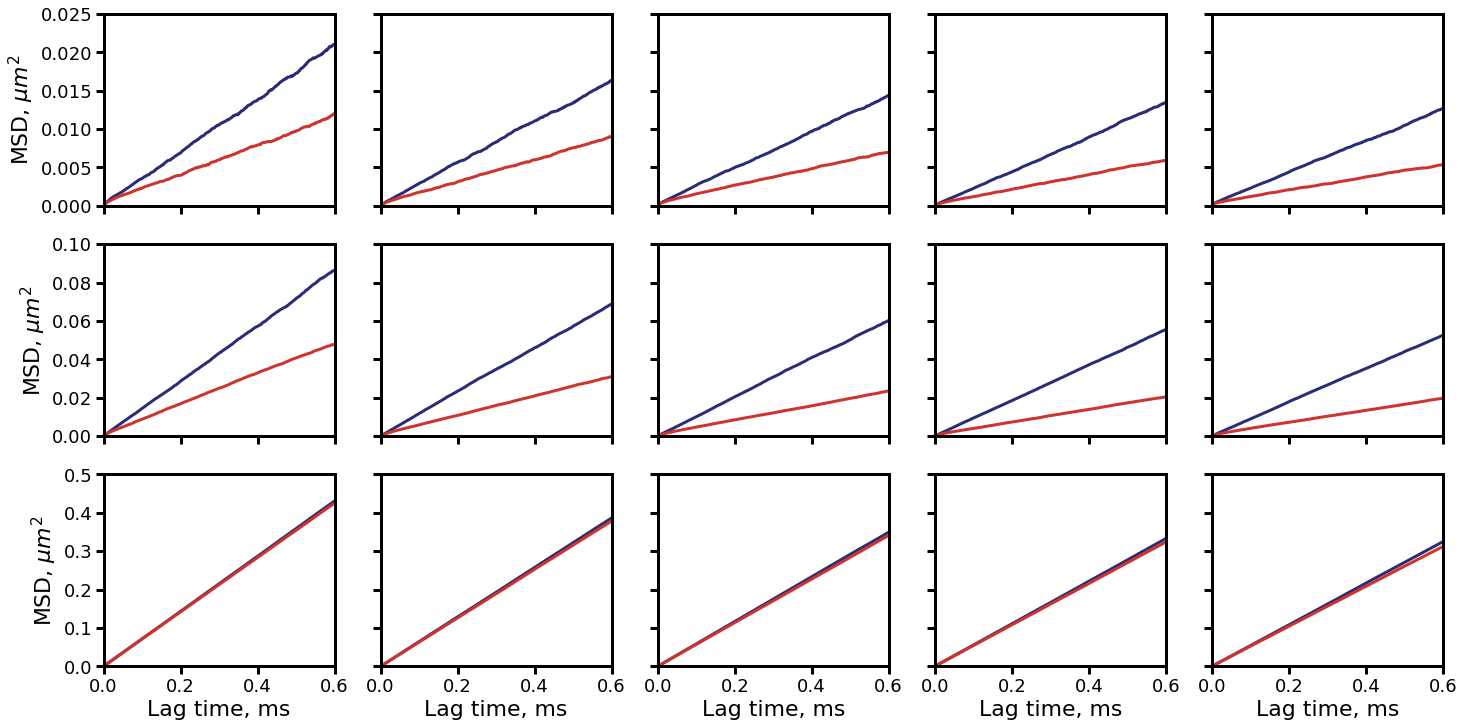

In [16]:
fig, ((ax11,ax12,ax13,ax14,ax15),(ax21,ax22,ax23,ax24,ax25),(ax31,ax32,ax33,ax34,ax35)) = plt.subplots(3,5)

col = ['#2A2C77', '#CE342D']
gr = [1, 1.5, 2, 2.5, 3]
eps = [0, 16]
namesall = [r'$\varepsilon_\mathrm{t,r} = 0\ k_\mathrm{B} T$', r'$\varepsilon_\mathrm{t,r} = 16\ k_\mathrm{B} T$']
axes_all = ((ax11,ax12,ax13,ax14,ax15),(ax21,ax22,ax23,ax24,ax25),(ax31,ax32,ax33,ax34,ax35))

ymax=[0.025,0.1,0.5]
ymin=[0,0,0]

#####

molec_all = ['rib', 'TC', 'crowd']
molec_index = [1,3,5]
for i in range(0,3):           # ribosome, TC, crowder          ROW
    molec_curr = molec_all[i]
    for j in range(0,5):       # gr1, gr1.5, gr2, gr2.5, gr3    FIGURE
        axis_curr = axes_all[i][j]
        phi_curr = phi[j]
        gr_curr = gr[j]
        molec_index_curr = molec_index[i]
        for k in range (0,2):  # eps0, eps16        LINE
            eps_curr = eps[k]
            filename = '../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/MSD_LimitedValency/{}e{}msd.txt'.format(gr_curr,eps_curr)
            MSD = np.loadtxt(filename)
            time = MSD[:,0]
            time = [x*tscale for x in time]
            MSD = MSD[:,molec_index_curr]
            MSD = [x*rscale for x in MSD]
            p,V = np.polyfit(time[148:444],MSD[148:444],1,cov=True)
            # below, printing diffusivity
#                 print('molec{} phi{} eps{}: {}'.format(molec_curr, phi_curr, eps_curr, p[0]/6))
            axis_curr.plot(time, MSD, color=col[k], linewidth=3, label=namesall[k])
            axis_curr.set_ylim(ymin[i],ymax[i])
            axis_curr.set_ylim(ymin[i],ymax[i])

#####

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0,6e-1)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Lag time, ms',size=22)
    ax.set_ylabel('MSD, $\mu m^2$',size=22)
    ax.tick_params(axis='both', labelsize=18,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    ax.ticklabel_format(axis='x', style='sci')
    
for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(24,12)
plt.savefig('./images/FigS9', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 3}$: Plotting the long-time self-diffusivities scaled to account for hydrodynamic and confinement effects, for ternary complexes (left) and ribosomes (right) in translation voxels at all growth rates/volume fractions (left to right) with isotropic attractions (colors).

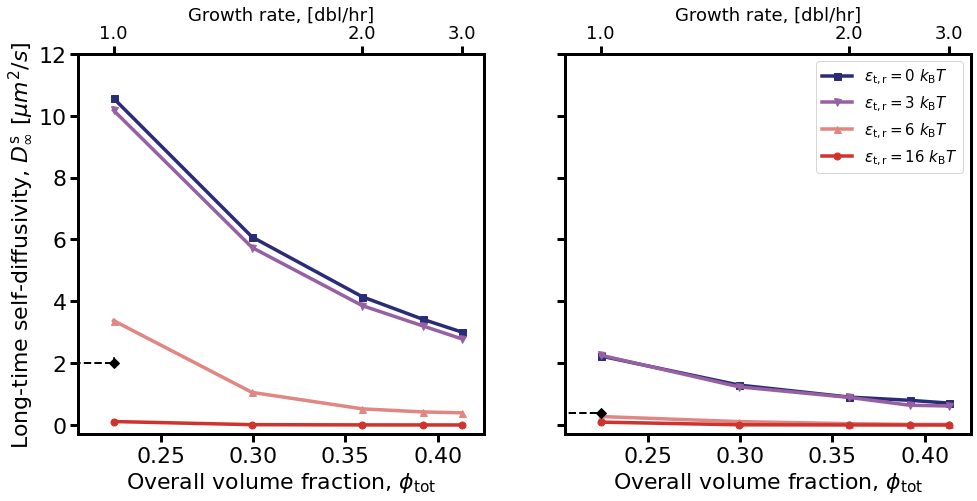

In [20]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
gr = [1,1.5, 2,2.5, 3]
phi_tot = [0.224305227,0.299376633587747,0.359217677,0.391970710905258,0.413017898]
D_scale_mono_confHI = [2.3, 3.2, 3.9, 4.4, 4.7] # from scaling above
colors_all = ['#2A2C77', '#9661A2', '#E08683', '#ce342d']
namesall = [r'$\varepsilon_\mathrm{t,r} = 0\ k_\mathrm{B} T$', r'$\varepsilon_\mathrm{t,r} = 3\ k_\mathrm{B} T$', r'$\varepsilon_\mathrm{t,r} = 6\ k_\mathrm{B} T$', r'$\varepsilon_\mathrm{t,r} = 16\ k_\mathrm{B} T$']
symbols = ['s', 'v', '^', 'o']
ids = ['TC', 'rib']
ax_list = (ax1,ax2)

#####

for i in range(0,2):
    D_alleps = np.loadtxt('../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/D_{}_alleps_allphi.txt'.format(ids[i]))
    curr_ax = ax_list[i]
    for j in range(0,4):
        D_eps = D_alleps[:,j]/D_scale_mono_confHI
        curr_ax.plot(phi_tot, D_eps, color=colors_all[j], linewidth=3.5, markersize=7, marker=symbols[j], label=namesall[j])

####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax2.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.205,0.425)
    #ax.set_yscale('log')
    ax.set_ylim(-0.3,12)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_{\mathrm{tot}}$',size=22)
    ax.set_ylabel('Long-time self-diffusivity, $D_\infty^\mathrm{s}$ [$\mu m^2/s$]',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=18)
    axa.tick_params(labelsize=18,width=3,length=8)

    
ax1.plot([0,0.224305227],[2.02,2.02], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax1.errorbar([0.224305227],[2.02], [0.19], color='k', marker='D',markersize=7, zorder=20)
ax2.legend(prop={'size': 15},loc='upper right')
        
ax2.plot([0,0.224305227],[0.4,0.4], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax2.errorbar([0.224305227],[0.4], [0.1], color='k', marker='D',markersize=7, zorder=200)

for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(16,7)
plt.savefig('./images/Fig3.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S8B}$: Plotting the long-time self-diffusivities scaled to account for hydrodynamic and confinement effects, for ternary complexes (left) and ribosomes (right) in translation voxels at all growth rates/volume fractions (left to right). We include the isotropic hard sphere case (blue) and attractive $\varepsilon_\mathrm{t,r}= \, 16 k_\mathrm{B}T$ cases with limited-valency (dashed red line) and isotropic (solid red line) attractions.

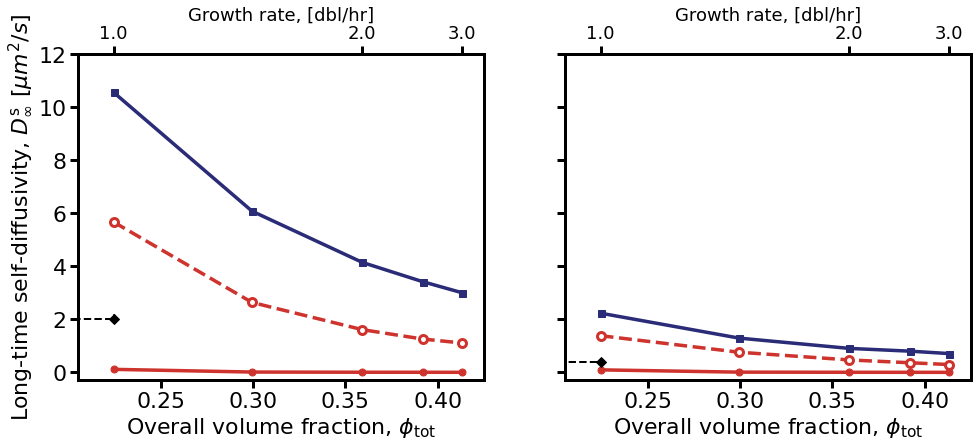

In [23]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax_list = (ax1,ax2)

#####

for i in range(0,2):
    D_alleps = np.loadtxt('../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/D_{}_alleps_allphi.txt'.format(ids[i]))
    curr_ax = ax_list[i]
    for j in range(0,2):
        D_eps = D_alleps[:,3*j]/D_scale_mono_confHI
        curr_ax.plot(phi_tot, D_eps, color=colors_all[3*j], linewidth=3.5, markersize=7, marker=symbols[3*j], label=namesall[3*j])

# extracted diffusivities from above
D_TC_eps0_patchy = [24.180228599140193, 18.791429857826454, 16.498559973380264, 15.421737455655789, 14.382068763455862]
D_TC_eps16_patchy = [13.041167519911568, 8.435650471577231, 6.275224097609755, 5.524433017103186, 5.211437280284783]
D_rib_eps0_patchy = [5.809877996547175, 4.406435963158676, 3.959238046080087, 3.7956175042427716, 3.386309842477127]
D_rib_eps16_patchy = [3.1796383692544965, 2.4278854211906533, 1.8240567647683934, 1.59201222957146, 1.3845299035953544]

D_TC_eps0_patchy = [i/j for i,j in zip(D_TC_eps0_patchy, D_scale_mono_confHI)]
D_TC_eps16_patchy = [i/j for i,j in zip(D_TC_eps16_patchy, D_scale_mono_confHI)]
ax1.plot(phi_tot, D_TC_eps16_patchy, color=colors_all[3], zorder=10, linewidth=3.5, linestyle='dashed', markersize=8, marker='o', markerfacecolor='w', markeredgecolor=colors_all[3], markeredgewidth=3, label='$\epsilon_{attr} = 16 kT$')

D_rib_eps0_patchy = [i/j for i,j in zip(D_rib_eps0_patchy, D_scale_mono_confHI)]
D_rib_eps16_patchy = [i/j for i,j in zip(D_rib_eps16_patchy, D_scale_mono_confHI)]
ax2.plot(phi_tot, D_rib_eps16_patchy, color=colors_all[3], zorder=10, linewidth=3.5, linestyle='dashed', markersize=8, marker='o', markerfacecolor='w', markeredgecolor=colors_all[3], markeredgewidth=3, label='Limited valency, $\epsilon_{attr} = 16 kT$')

####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax2.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.205,0.425)
    ax.set_ylim(-0.3,12)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_\mathrm{tot}$',size=22)
    ax.set_ylabel('Long-time self-diffusivity, $D_\infty^\mathrm{s}$ [$\mu m^2/s$]',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=18)
    axa.tick_params(labelsize=18,width=3,length=8)
    
ax1.plot([0,0.224305227],[2.02,2.02], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax1.errorbar([0.224305227],[2.02], [0.19], color='k', marker='D',markersize=7, zorder=20)       
ax2.plot([0,0.224305227],[0.4,0.4], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax2.errorbar([0.224305227],[0.4], [0.1], color='k', marker='D',markersize=7, zorder=200)

for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(16,6)
plt.savefig('./images/FigS8B.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S3}$: Calculating & plotting the effective viscosity felt by ternary complexes in translation voxels for all growth rates / volume fractions (x-axis) and isotropic attraction strengths (colors). Compared to that of water (dashed line) and $\textit{in vivo}$ (dotted line) estimates.

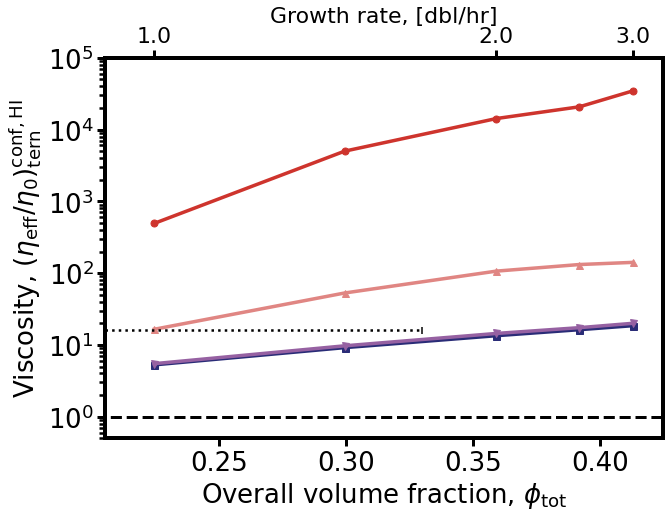

In [28]:
fig, ax = plt.subplots()

eps = [0, 3, 6, 16]
D_SE_TC = 55.7 #um^2/s
D_SE_rib = 25.2 #um^2/s

#####

D_alleps = np.loadtxt('../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/D_TC_alleps_allphi.txt')
for j in range(0,4):
    D_eps = D_alleps[:,j]
    # see Eq. 9
    for i in range(0,5): D_eps[i] = D_SE_TC/D_eps[i]*D_scale_mono_confHI[i]
    ax.plot(phi_tot, D_eps, color=colors_all[j], linewidth=3.5, markersize=7, marker=symbols[j], label=namesall[j])

#####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.205,0.425)
    ax.set_yscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.5,100000) #10000
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Overall volume fraction, $\phi_{\mathrm{tot}}$',size=26)
    ax.tick_params(axis='both', labelsize=26,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=22)
    axa.tick_params(labelsize=22,width=3,length=8)
    
ax.set_ylabel(r'Viscosity, $\left( \eta_{\mathrm{eff}}/\eta_{0} \right)_{\mathrm{tern}}^{\mathrm{conf,HI}}$',size=26)
ax.plot([0,1],[1,1], color='k', linestyle='dashed', linewidth=3, zorder=20)
ax.plot([0,0.33],[11/0.6913,11/0.6913], color='k', linestyle='dotted', linewidth=2.5, zorder=20)
ax.errorbar([0.33],[11/0.6913], [1.8], color='k', marker='D',markersize=0, zorder=20)

fig.set_size_inches(10, 7) # 8.5, 7; 10, 7
plt.savefig('./images/Fig2C.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 5C}$: Calculating & plotting the effective viscosity felt by ternary complexes in translation voxels for all growth rates / volume fractions (x-axis) in the hard-sphere (blue) and attractive $\varepsilon_\mathrm{t,r}= \, 16 k_\mathrm{B}T$ cases with limited-valency (dashed red line) and isotropic (solid red line) attractions. Compared to that of water (dashed line) and $\textit{in vivo}$ (dotted line) estimates.

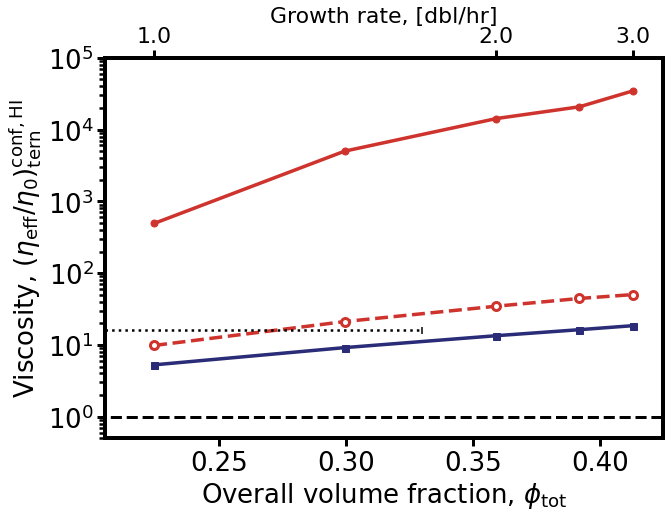

In [32]:
fig, ax = plt.subplots()

eps = [0, 3, 6, 16]
D_SE_TC = 55.7 #um^2/s
D_SE_rib = 25.2 #um^2/s
colors_all = ['#2A2C77', '#9661A2', '#E08683', '#ce342d']

#####

D_alleps = np.loadtxt('../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/D_TC_alleps_allphi.txt')
for j in range(0,2):
    D_eps = D_alleps[:,3*j]
    for i in range(0,5): D_eps[i] = D_SE_TC/D_eps[i]*D_scale_mono_confHI[i]
    ax.plot(phi_tot, D_eps, color=colors_all[3*j], linewidth=3.5, markersize=7, marker=symbols[3*j], label=namesall[3*j])

D_TC_eps16_patchy = [13.041167519911568, 8.435650471577231, 6.275224097609755, 5.524433017103186, 5.211437280284783]
for i in range(0,5): D_TC_eps16_patchy[i] = D_SE_TC/D_TC_eps16_patchy[i]*D_scale_mono_confHI[i]
ax.plot(phi_tot, D_TC_eps16_patchy, color='#ce342d', zorder=10, linewidth=3.5, linestyle='dashed', markersize=8, marker='o', markerfacecolor='w', markeredgecolor='#ce342d', markeredgewidth=3, label='$\epsilon_{attr} = 16 kT$')

#####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.205,0.425)
    ax.set_yscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.5,100000) #10000
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Overall volume fraction, $\phi_{\mathrm{tot}}$',size=26)
    ax.tick_params(axis='both', labelsize=26,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=22)
    axa.tick_params(labelsize=22,width=3,length=8)
    
ax.set_ylabel(r'Viscosity, $\left( \eta_{\mathrm{eff}}/\eta_{0} \right)_{\mathrm{tern}}^{\mathrm{conf,HI}}$',size=26)
ax.plot([0,1],[1,1], color='k', linestyle='dashed', linewidth=3, zorder=20)
ax.plot([0,0.33],[11/0.6913,11/0.6913], color='k', linestyle='dotted', linewidth=2.5, zorder=20)
ax.errorbar([0.33],[11/0.6913], [1.8], color='k', marker='D',markersize=0, zorder=20)

fig.set_size_inches(10, 7) # 8.5, 7; 10, 7
plt.savefig('./images/Fig2C.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S12}$: Plotting the probability distribution of the duration of ternary complex - ribosome binding events in limited-valency translation voxels with 0 (dashed lines) and $16 k_\mathrm{B}T$ (solid lines) attractions at growth rates of 1, 2, and 3 dbl/hr.

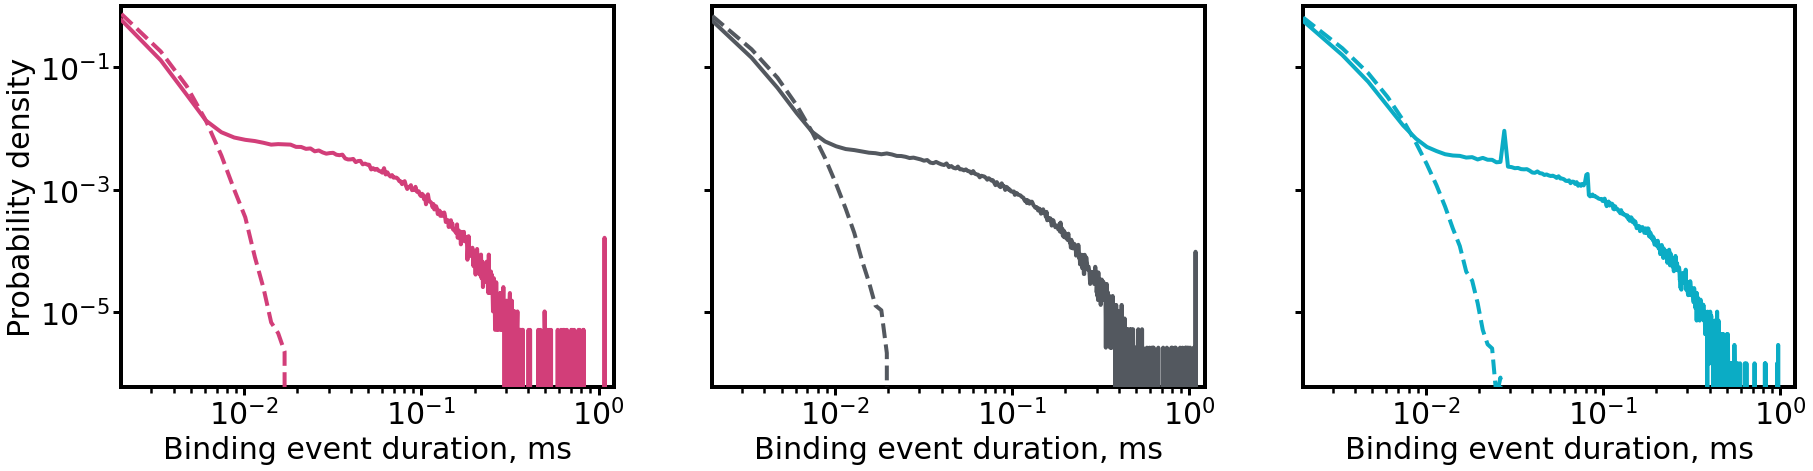

In [46]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3)

# calculating bins in terms of milliseconds
binwidth = 1
tscale = 0.0000005*4*0.0067723*100000   # s
binsall = np.arange(1,5000+binwidth,binwidth)
binscenters = np.array([0.5 * tscale * (binsall[i] + binsall[i+1]) for i in range(len(binsall)-1)])

e16 = ['1e16','2e16','3e16']
e0 = ['1e0','2e0','3e0']
axes = [ax1,ax2,ax3]
colors_all = ['#d23e79', '#53585F', '#0bacc5']
linestyle_all = ['dashed','solid']
eps = ['0','16']

for j in range(0,2):
    epslist = []
    for k in range(0,3): epslist.append('{}e{}'.format(k+1,eps[j]))
    for i, name in enumerate(epslist):
        search = np.load('../Data/FIG2C_3_5C_S1_S3_S4_S8B_S9_S12__Dynamics/BindingTimes/{}/bound_t.npy'.format(name),allow_pickle=True)
        search1 = np.concatenate(np.concatenate(search).tolist())
        counts, bins = np.histogram(search1,binsall,density=True)
        ax_curr = axes[i]
        ax_curr.plot(binscenters,counts, color=colors_all[i], zorder=10, linewidth=4, linestyle=linestyle_all[j])  
        avg = np.mean(search1*tscale)

#####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax1.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(1.5*tscale,900*tscale)
    ax.set_yscale('log')
    ax.set_ylim(6e-7,1e0)
    ax.set_xscale('log')
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Binding event duration, ms',size=30)
    ax.set_ylabel('Probability density',size=30)
    ax.tick_params(axis='both', labelsize=30,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)

for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(30,7)
plt.savefig('./images/FigS12.png', bbox_inches='tight', dpi=300)
